This notebook illustrates the EDA on tree types found in the Roosevelt National Forest in Colorado. 
Link to dataset -> https://www.kaggle.com/uciml/forest-cover-type-dataset



In [1]:
import pandas as pd
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 1000)

In [2]:
df = pd.read_csv("/Users/kbhithesh/Downloads/covtype.csv")

In [3]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


The first ten columns have numerical value, and the rest columns, namely, Wilderness_Area and Soil_Type, these are categorical variables with 4 and 40 different categories respectively.

In [4]:
print(df.describe(include = 'all'))

           Elevation         Aspect          Slope  \
count  581012.000000  581012.000000  581012.000000   
mean     2959.365301     155.656807      14.103704   
std       279.984734     111.913721       7.488242   
min      1859.000000       0.000000       0.000000   
25%      2809.000000      58.000000       9.000000   
50%      2996.000000     127.000000      13.000000   
75%      3163.000000     260.000000      18.000000   
max      3858.000000     360.000000      66.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     581012.000000                   581012.000000   
mean                         269.428217                       46.418855   
std                          212.549356                       58.295232   
min                            0.000000                     -173.000000   
25%                          108.000000                        7.000000   
50%                          218.000000                       3

In [5]:
print('Data Dimension:')
print('Number of Records:', df.shape[0])
print('Number of Features:', df.shape[1])

Data Dimension:
Number of Records: 581012
Number of Features: 55


In [6]:
print('Skewness of the below features:')
print(df.skew())

Skewness of the below features:
Elevation                              -0.817596
Aspect                                  0.402628
Slope                                   0.789273
Horizontal_Distance_To_Hydrology        1.140437
Vertical_Distance_To_Hydrology          1.790250
Horizontal_Distance_To_Roadways         0.713679
Hillshade_9am                          -1.181147
Hillshade_Noon                         -1.063056
Hillshade_3pm                          -0.277053
Horizontal_Distance_To_Fire_Points      1.288644
Wilderness_Area1                        0.205618
Wilderness_Area2                        4.061595
Wilderness_Area3                        0.257822
Wilderness_Area4                        3.575561
Soil_Type1                             13.736670
Soil_Type2                              8.615358
Soil_Type3                             10.838630
Soil_Type4                              6.625176
Soil_Type5                             18.995243
Soil_Type6                           

In [7]:
class_dist=df.groupby('Cover_Type').size()
for i,number in enumerate(class_dist):
    percent=(number/class_dist.sum())*100
    print('Cover_Type',class_dist.index[i])
    print('%.2f'% percent,'%')

Cover_Type 1
36.46 %
Cover_Type 2
48.76 %
Cover_Type 3
6.15 %
Cover_Type 4
0.47 %
Cover_Type 5
1.63 %
Cover_Type 6
2.99 %
Cover_Type 7
3.53 %


In [8]:
data=df.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points']

binary_data=df.loc[:,'Wilderness_Area1':'Soil_Type40']

Wilderness_data=df.loc[:,'Wilderness_Area1': 'Wilderness_Area4']

Soil_data=df.loc[:,'Soil_Type1':'Soil_Type40']

In [9]:
print('Soil Type',' Occurence_count')
for col in binary_data:
    count=binary_data[col].value_counts()[1] #considering all one's among 1 and 0's in each soil type
    if count < 1000:
        print(col,count)

Soil Type  Occurence_count
Soil_Type7 105
Soil_Type8 179
Soil_Type14 599
Soil_Type15 3
Soil_Type21 838
Soil_Type25 474
Soil_Type28 946
Soil_Type36 119
Soil_Type37 298


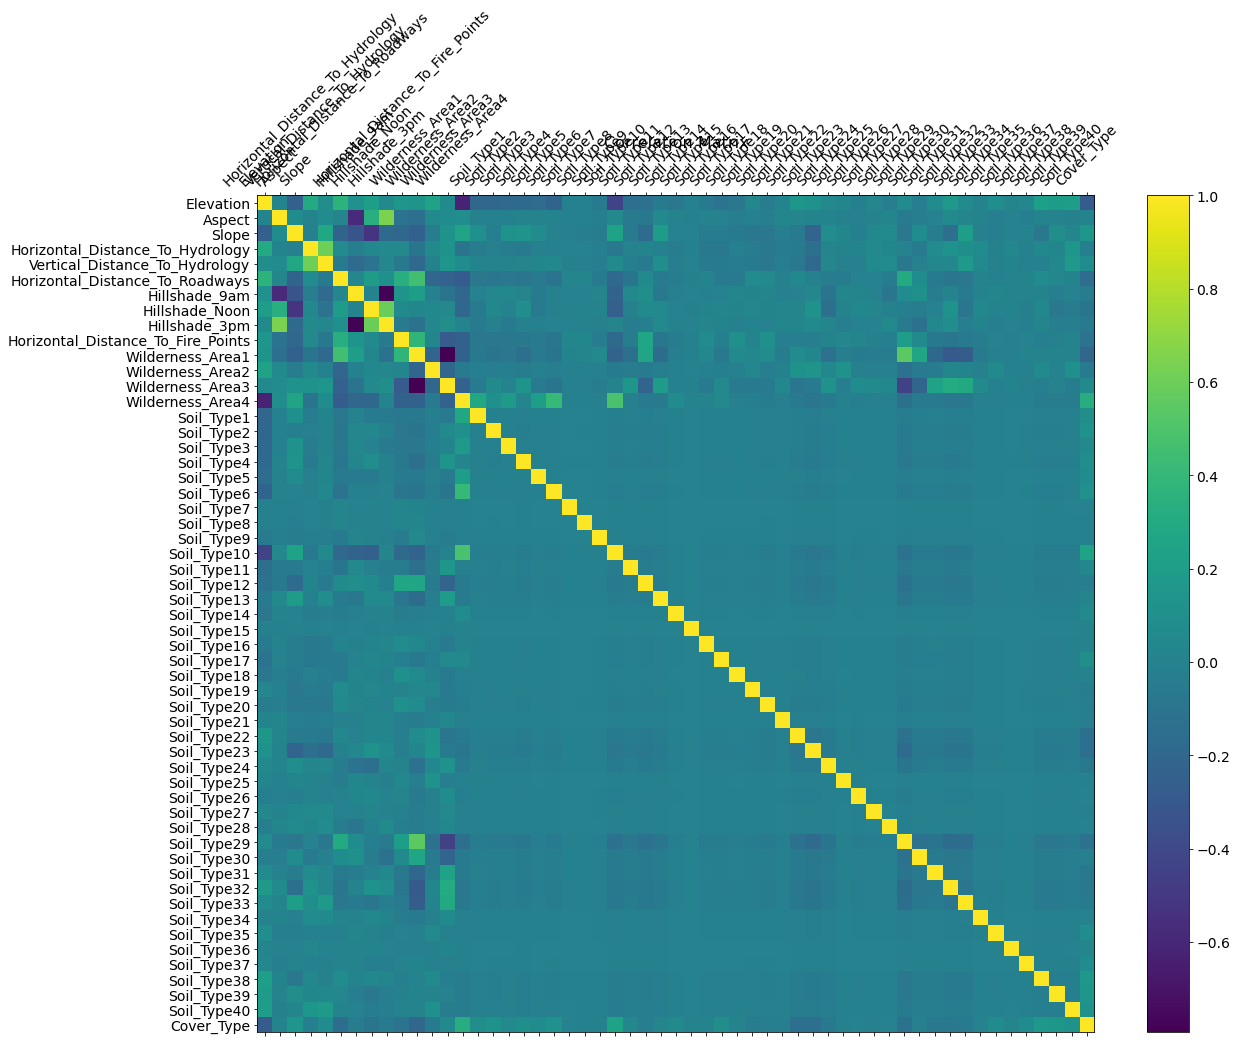

In [10]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

Data Modelling

X = Input or independent variables
y= Target variable ('Cover_Type')

In [11]:
X=df.loc[:,'Elevation':'Soil_Type40']
y=df['Cover_Type']

In [12]:
#Features to be removed before the model
rem=['Soil_Type7','Soil_Type8','Soil_Type14','Soil_Type15',
     'Soil_Type21','Soil_Type25','Soil_Type28','Soil_Type36','Soil_Type37']

In [13]:
X.drop(rem, axis=1, inplace=True)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=101)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC(gamma='auto')))

In [16]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=0)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))


LR: 0.709241 (0.001869)
LDA: 0.678701 (0.001787)
KNN: 0.965189 (0.000894)
CART: 0.933924 (0.001495)
NB: 0.456633 (0.002807)


In [17]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,7)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

Text(0, 0.5, 'Accuracy')

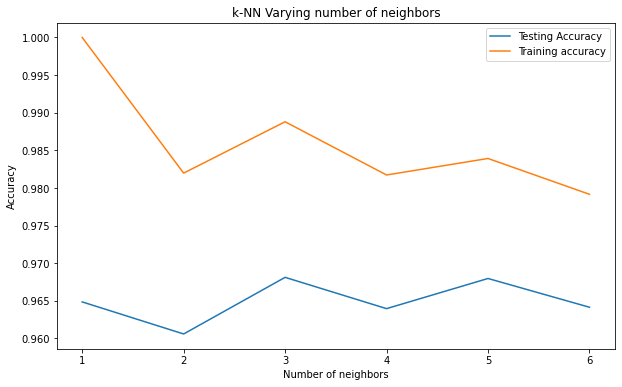

In [18]:
plt.figure(figsize=(10,6))
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
#plt.show()

In [19]:
knn = KNeighborsClassifier(n_neighbors=5)

In [20]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [21]:
Accuracy=knn.score(X_test,y_test)
print('KNN Accuracy:',Accuracy)

KNN Accuracy: 0.9679731227582219


In [22]:
from sklearn import metrics

y_pred = knn.predict(X_test)
print('KNN: %f'% metrics.accuracy_score(y_test, y_pred))

KNN: 0.967973


In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(confusion_matrix(y_test,y_pred))
print("\nEvaluation metrics---> precision/recall with f1 score\n")
print(classification_report(y_test,y_pred))

[[50934  1557     1     0    22     6   142]
 [ 1440 69131    88     1   148    73    11]
 [    1   100  8819    35     6   119     0]
 [    0     2   115   547     0    41     0]
 [   26   225    24     0  2110     6     0]
 [    2   110   171    16     6  4071     0]
 [  130    26     0     0     2     0  4989]]

Evaluation metrics---> precision/recall with f1 score

              precision    recall  f1-score   support

           1       0.97      0.97      0.97     52662
           2       0.97      0.98      0.97     70892
           3       0.96      0.97      0.96      9080
           4       0.91      0.78      0.84       705
           5       0.92      0.88      0.90      2391
           6       0.94      0.93      0.94      4376
           7       0.97      0.97      0.97      5147

    accuracy                           0.97    145253
   macro avg       0.95      0.92      0.94    145253
weighted avg       0.97      0.97      0.97    145253

